##### Medical Cost Personal Insurance Project

###### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be 

related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to 

receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical 

costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many 

others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .


Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?


Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [1]:
### Import the Required libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

###### Data collection and Processing

In [2]:
#1.Loading a dataset and creating a DataFrame
insurance_dataset=pd.read_csv('medical_cost_insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# No rows and cols in loaded dataset

insurance_dataset.shape

(1338, 7)

In [4]:
#Dataset information
insurance_dataset.info()

# Categorical features:sex,smoker,region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Checking the Missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Stastical Analysis for the given dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Bujju\AppData\Local\Temp\ipykernel_17584\140869972.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


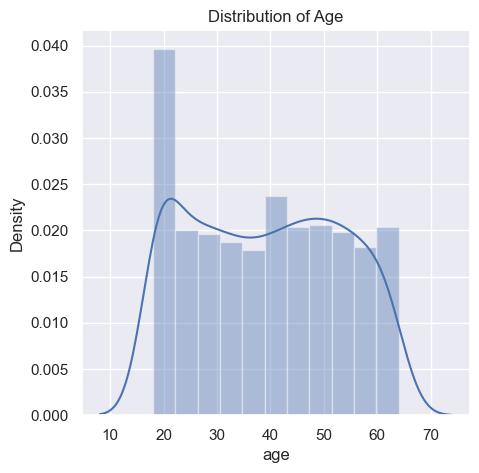

In [7]:
#Checking the dataset distribution of each column
#Distiribution of Age
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['age'])
plt.title('Distribution of Age')
plt.show()


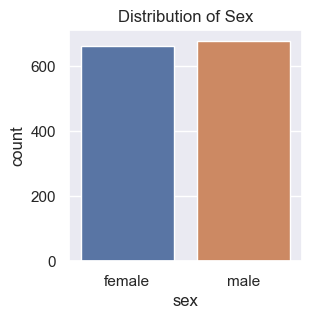

In [8]:
# Distribution for Categorical vaue:sex

plt.figure(figsize=(3,3))
sns.countplot(x='sex',data=insurance_dataset)
plt.title("Distribution of Sex")
plt.show()

In [9]:
#To get the value counts of sex
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Bujju\AppData\Local\Temp\ipykernel_17584\559000122.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


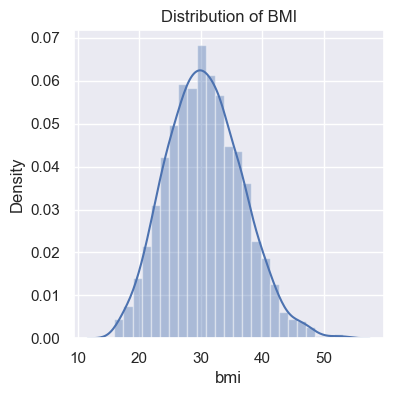

In [10]:
#Distiribution of Age
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(insurance_dataset['bmi'])
plt.title('Distribution of BMI')
plt.show()

In [11]:
#To get the value counts of children
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

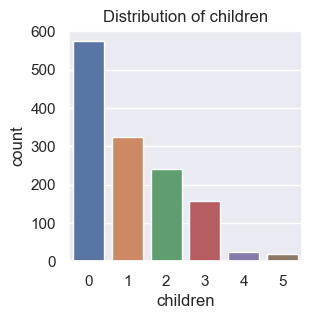

In [12]:
# Distribution for Categorical vaue:children

plt.figure(figsize=(3,3))
sns.countplot(x='children',data=insurance_dataset)
plt.title("Distribution of children")
plt.show()

In [13]:
#smoker
#To get the value counts of Smoker
insurance_dataset['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

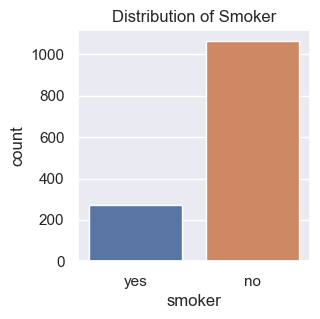

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title("Distribution of Smoker")
plt.show()

In [15]:
#region
#To get the value counts of region
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

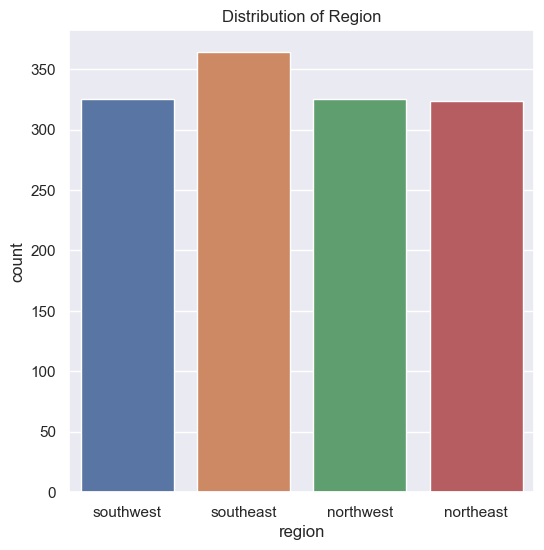

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title("Distribution of Region")
plt.show()

C:\Users\Bujju\AppData\Local\Temp\ipykernel_17584\1202115402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


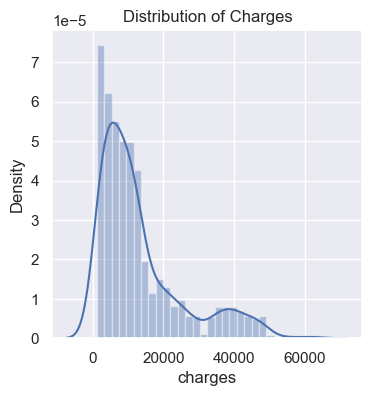

In [17]:
#Distiribution of charges
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(insurance_dataset['charges'])
plt.title('Distribution of Charges')
plt.show()

In [18]:
#Find the correlation between the values
insurance_dataset.corr()

C:\Users\Bujju\AppData\Local\Temp\ipykernel_17584\3782203004.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_dataset.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [19]:
#Convert the categorical value into numerical value
#Encoding the Sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Encoding the region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [20]:
#Split the features and Targets

x=insurance_dataset.drop(columns='charges',axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [21]:
y=insurance_dataset['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
#Spliting the Data into Training Data and Testing Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1070, 6)
x_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


In [23]:
# Model training
#Loading the Regression model
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
# Evaluate the model 
#Prediction on Training data
training_data_prediction=regressor.predict(x_train)

In [25]:
#Validating the r2 score between the actual vs predicted
r2_trainingdatavalue=metrics.r2_score(y_train,training_data_prediction)
r2_trainingdatavalue

0.751505643411174

In [26]:
#Prediction on test data
test_data_prediction=regressor.predict(x_test)

#Validating the r2 score between the actual vs predicted of test data
r2_testdatavalue=metrics.r2_score(y_test,test_data_prediction)
r2_testdatavalue

0.7447273869684077

In [27]:
# Test with newdata for predict the output
input_data=(31,1,25.74,0,1,0)

input_data_arr=np.asarray(input_data)
input_data_arr

array([31.  ,  1.  , 25.74,  0.  ,  1.  ,  0.  ])

In [28]:
input_reshaped=input_data_arr.reshape(1,-1)
input_reshaped

array([[31.  ,  1.  , 25.74,  0.  ,  1.  ,  0.  ]])

In [29]:
result=regressor.predict(input_reshaped)
print('Insurance cost(USD):',result[0])

Insurance cost(USD): 3760.0805764960496


C:\Users\Bujju\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
